#### C. Deep Learning
This section is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat section B with Deep Learning.

#### Anaconda environment
* source activate deeplearning
* jupyter notebook 
* source deactivate deeplearning

More details are available online: https://www.dataweekends.com/blog/2017/03/09/set-up-your-mac-for-deep-learning-with-python-keras-and-tensorflow

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="./SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi"]
FeatureNames=[ "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [11]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])

#### Deep learning backend
The deep learning backend can be either theano or temsorflow. Use Tensorflow and thus comment out theano for now.

In [12]:
# Since lxplus does not have any GPUs, please DO NOT RUN THIS CELL ON LXPLUS.
# Selecting First GPU in the system
# import os
# gpuid= 0
# print ("Using GPU:", gpuid)
# os.environ['THEANO_FLAGS'] = "mode=FAST_RUN,device=gpu%s,floatX=float32,force_device=True" % (gpuid)

In [13]:
# import theano
# theano.config.profile=False

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_Train.shape[1], init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/Users/jameszhang/anaconda2/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform", input_dim=18)`
  """
/Users/jameszhang/anaconda2/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  
/Users/jameszhang/anaconda2/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  import sys


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [16]:
history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), nb_epoch=10, batch_size=2048)

Train on 500000 samples, validate on 50000 samples
Epoch 1/10
500000/500000 [==============================] - 2s - loss: 0.6122 - acc: 0.7032 - val_loss: 0.4927 - val_acc: 0.7768
Epoch 2/10
500000/500000 [==============================] - 1s - loss: 0.4716 - acc: 0.7828 - val_loss: 0.4663 - val_acc: 0.7853
Epoch 3/10
500000/500000 [==============================] - 1s - loss: 0.4572 - acc: 0.7904 - val_loss: 0.4573 - val_acc: 0.7889
Epoch 4/10
500000/500000 [==============================] - 1s - loss: 0.4493 - acc: 0.7939 - val_loss: 0.4495 - val_acc: 0.7916
Epoch 5/10
500000/500000 [==============================] - 1s - loss: 0.4435 - acc: 0.7955 - val_loss: 0.4448 - val_acc: 0.7934
Epoch 6/10
500000/500000 [==============================] - 1s - loss: 0.4409 - acc: 0.7969 - val_loss: 0.4434 - val_acc: 0.7938
Epoch 7/10
500000/500000 [==============================] - 1s - loss: 0.4398 - acc: 0.7976 - val_loss: 0.4423 - val_acc: 0.7953
Epoch 8/10
500000/500000 [====================

In [17]:
print history.history

{'acc': [0.70316000000762935, 0.78275999998855594, 0.79040600000762939, 0.7939339999961853, 0.79550599999618532, 0.79692799998474118, 0.79763600000000001, 0.7978759999961853, 0.79808600000762941, 0.79827199998474119], 'loss': [0.61224734049987795, 0.47162551624107363, 0.45716904064559938, 0.44932607213783265, 0.44345089010429384, 0.44094182800292969, 0.43977234993743897, 0.43894262891006469, 0.4383764655227661, 0.43788745177268984], 'val_acc': [0.77676000040054316, 0.78526000013351438, 0.78890000032424923, 0.79162000013351441, 0.79337999977111817, 0.79380000013351437, 0.79534000041961672, 0.79492000041961675, 0.79582000005722042, 0.79545999996185301], 'val_loss': [0.49273895414352414, 0.46627560482978819, 0.4573267499256134, 0.4494746424674988, 0.44476027473449709, 0.44341805072784424, 0.44225036154747011, 0.44171887449264524, 0.44094915055274964, 0.44056742130279541]}


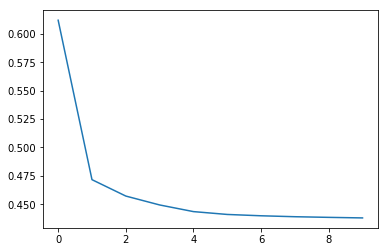

In [18]:
loss_history=history.history["loss"]
plt.plot(range(len(loss_history)),loss_history)

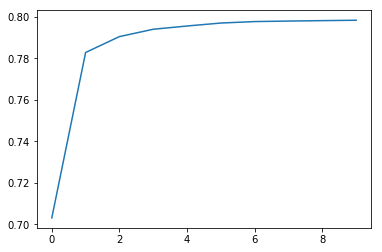

In [19]:
acc_history=history.history["acc"]
plt.plot(range(len(acc_history)),acc_history)